# Dividir el dataset en el conjunto de entrenaminto y testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("python-ml-course/datasets/ads/Advertising.csv")

In [9]:
a = np.random.randn(len(data))

(array([ 5.,  8., 18., 19., 36., 42., 36., 22., 11.,  3.]),
 array([-2.50141388, -2.00250782, -1.50360177, -1.00469571, -0.50578966,
        -0.0068836 ,  0.49202245,  0.99092851,  1.48983456,  1.98874061,
         2.48764667]),
 <a list of 10 Patch objects>)

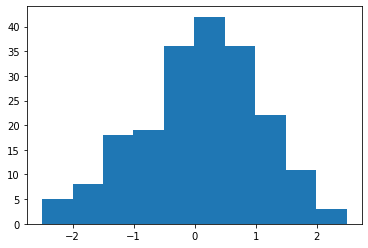

In [10]:
plt.hist(a)

In [11]:
check = (a < 0.8)
training = data[check]
testing = data[~check]

In [12]:
len(training),len(testing)

(152, 48)

In [14]:
import statsmodels.formula.api as smf
lm = smf.ols(formula="Sales~TV+Radio",data=training).fit()

In [15]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     629.6
Date:                Mon, 16 Mar 2020   Prob (F-statistic):           2.13e-73
Time:                        00:35:59   Log-Likelihood:                -297.49
No. Observations:                 152   AIC:                             601.0
Df Residuals:                     149   BIC:                             610.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9336      0.345      8.505      0.000       2.252       3.615
TV             0.0449      0.002     27.795      0.000       0.042       0.048
Radio          0.1926      0.009     20.492      0.000       0.174       0.211
==============================================================================
Omnibus:                       59.629   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.379
Skew:                          -1.543   Prob(JB):                     4.11e-40
Kurtosis:                       7.372   Cond. No.                         430.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$ sales = 2.9336 + 0.0449*TV + 0.1926*Radio $

## Validacion del modelo con el conjunto de testing

In [18]:
sales_pred = lm.predict(testing)
sales_pred

2      12.547770
14     18.435173
16     13.028170
19     14.151197
26     14.993865
30     21.536098
32      7.586750
41     17.314724
44      9.011267
45     15.129705
51      9.290763
53     20.031874
55     21.380159
56      8.674384
65      7.823140
74     17.253873
75     12.110506
82     10.224979
84     20.802828
87     15.724878
98     24.089297
99     17.036803
104    20.235921
111    21.105813
113    16.312720
115    13.047719
116    11.938228
117     6.518005
120    14.440441
121     7.957866
123    15.125823
124    19.460030
125     9.121889
127     6.534514
131    15.399489
146    15.120111
148    12.402922
155     5.352246
158    10.567119
164    11.027501
168    17.151037
171    14.345560
173    11.862318
174    13.574124
182     6.554949
191     8.403936
193    18.513406
197    12.672245
dtype: float64

In [20]:
SSD = sum((testing["Sales"] - sales_pred)**2)
SSD

112.80080080291043

In [22]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

1.583251231575993

In [25]:
sales_mean = np.mean(testing["Sales"])
error = RSE/sales_mean
error

0.11445189625850552